# Introduction

## Background Information:

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

## The Problem:

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, __the executive team believes that maximizing the number of annual members will be key to future growth.__ Rather than creating a marketing campaign that targets all-new customers, there is a very good chance to convert casual riders into members with targeted marketing.

## Objective: 

- To better understand how annual members and casual riders differ.

- To determine why casual riders would buy a membership.


__The insights generated from this analysis would allow Cyclistic to design marketing strategies aimed at converting casual riders into annual members.__

![image info](./images/bike_sharing.jpeg)

### Load Libraries

In [1]:
# disable scientific notation
options(scipen = 999)

# suppress warnings
options(warn = -1)

library('tidyverse')
library('lubridate')
library('ggplot2')
library('ggmap') 
library('gridExtra')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



### Load Data

We will use data from Apr-2020 to Mar-2021 for this analysis. Data is provided by month and we will merge them into one dataframe.

In [2]:
# load individual datasets

tripdata_2020_04 <- read.csv("data/csv/202004-divvy-tripdata.csv")
tripdata_2020_05 <- read.csv("data/csv/202005-divvy-tripdata.csv")
tripdata_2020_06 <- read.csv("data/csv/202006-divvy-tripdata.csv")
tripdata_2020_07 <- read.csv("data/csv/202007-divvy-tripdata.csv")
tripdata_2020_08 <- read.csv("data/csv/202008-divvy-tripdata.csv")
tripdata_2020_09 <- read.csv("data/csv/202009-divvy-tripdata.csv")
tripdata_2020_10 <- read.csv("data/csv/202010-divvy-tripdata.csv")
tripdata_2020_11 <- read.csv("data/csv/202011-divvy-tripdata.csv")
tripdata_2020_12 <- read.csv("data/csv/202012-divvy-tripdata.csv")
tripdata_2021_01 <- read.csv("data/csv/202101-divvy-tripdata.csv")
tripdata_2021_02 <- read.csv("data/csv/202102-divvy-tripdata.csv")
tripdata_2021_03 <- read.csv("data/csv/202103-divvy-tripdata.csv")

In [3]:
# display sample data

head(tripdata_2020_04)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


In [4]:
# merging into one dataframe

full_df <- rbind(tripdata_2020_04,
                 tripdata_2020_05,
                 tripdata_2020_06, 
                 tripdata_2020_07,
                 tripdata_2020_08, 
                 tripdata_2020_09,
                 tripdata_2020_10, 
                 tripdata_2020_11,
                 tripdata_2020_12,
                 tripdata_2021_01,
                 tripdata_2021_02,
                 tripdata_2021_03)

# get dimensions of resulting dataframe
print(dim(full_df))

[1] 3489748      13


In [5]:
# rename column member_casual

full_df <- full_df %>%
    rename(member_type = member_casual)

### Data Quality Check

In [6]:
# check for duplicate rows

# get unique count of ride ID
print(n_distinct(full_df$ride_id))

[1] 3489539


There are 209 duplicates in the merged dataframe. We will go ahead and remove them.

In [7]:
# drop duplicates
full_df <- full_df[!duplicated(full_df$ride_id), ]

# get dimensions of resulting dataframe
print(dim(full_df))

# get unique count of ride ID
print(n_distinct(full_df$ride_id))

[1] 3489539      13
[1] 3489539


In [8]:
# check data types

str(full_df)

'data.frame':	3489539 obs. of  13 variables:
 $ ride_id           : Factor w/ 3489539 levels "00009D28BA1C43CB",..: 55878 27896 31201 14132 13221 17743 53958 83622 52725 56115 ...
 $ rideable_type     : Factor w/ 3 levels "docked_bike",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ started_at        : Factor w/ 3040228 levels "2020-04-01 00:00:30",..: 71395 42635 1723 16637 43704 80306 3344 16464 38494 9169 ...
 $ ended_at          : Factor w/ 3027775 levels "2020-04-01 00:10:45",..: 71198 42488 1689 16514 43689 80020 3292 16700 38366 9137 ...
 $ start_station_name: Factor w/ 709 levels "2112 W Peterson Ave",..: 207 201 367 65 456 382 527 410 329 287 ...
 $ start_station_id  : chr  "86" "503" "142" "216" ...
 $ end_station_name  : Factor w/ 707 levels "","2112 W Peterson Ave",..: 345 303 276 593 480 526 223 572 322 96 ...
 $ end_station_id    : chr  "152" "499" "255" "657" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_

In [9]:
# convert started_at and ended_at to datetime format

full_df$started_at <- as.POSIXct(full_df$started_at, "%Y-%m-%d %H:%M:%S", tz = 'GMT')
full_df$ended_at <- as.POSIXct(full_df$ended_at, "%Y-%m-%d %H:%M:%S", tz = 'GMT')

In [10]:
# check resulting data type

str(full_df$started_at)
str(full_df$ended_at)

 POSIXct[1:3489539], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" ...
 POSIXct[1:3489539], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" ...


In [11]:
# check for null values

map(full_df, ~sum(is.na(.)))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 0

$start_station_id
[1] 83583

$end_station_name
[1] 0

$end_station_id
[1] 98104

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 4737

$end_lng
[1] 4737

$member_type
[1] 0

There are over 90k rows with null values in the end_station_id column. We will go ahead and drop them.

In [12]:
# drop null values
full_df_clean <- drop_na(full_df)

# check for null values
map(full_df_clean, ~sum(is.na(.)))

# get dimensions of resulting dataframe
print(dim(full_df_clean))

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 0

$start_station_id
[1] 0

$end_station_name
[1] 0

$end_station_id
[1] 0

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 0

$end_lng
[1] 0

$member_type
[1] 0

[1] 3354306      13


### Data Mining

We can extract individual date parts which can be useful for our analysis.

In [13]:
# extract date
full_df_clean$date <- as.Date(full_df_clean$started_at) 

# extract month
full_df_clean$month <- format(as.Date(full_df_clean$date), "%m")

# extract day
full_df_clean$day <- format(as.Date(full_df_clean$date), "%d")

# extract year
full_df_clean$year <- format(as.Date(full_df_clean$date), "%Y")

# extract day of week
full_df_clean$day_of_week <- format(as.Date(full_df_clean$date), "%A")

# extract ride start hour
full_df_clean <- full_df_clean %>%
    mutate(start_hour = strftime(full_df_clean$started_at, tz = "GMT", "%H"))

In [14]:
# create year-month column, since our data is distributed over 2 years

full_df_clean$year_month <- paste(full_df_clean$year, "-", full_df_clean$month)

In [15]:
head(full_df_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_type,date,month,day,year,day_of_week,start_hour,year_month
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,04,26,2020,Sunday,17,2020 - 04
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,04,17,2020,Friday,17,2020 - 04
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01,04,01,2020,Wednesday,17,2020 - 04
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07,04,07,2020,Tuesday,12,2020 - 04
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18,04,18,2020,Saturday,10,2020 - 04
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,2020-04-30,04,30,2020,Thursday,17,2020 - 04


We can also extract useful information from the bike rides (duration, distance etc).

In [16]:
# create new column ride_duration_mins -> total ride duration in mins

full_df_clean <- full_df_clean %>%
    mutate(ride_duration_mins = as.numeric(full_df_clean$ended_at - full_df_clean$started_at) / 60)

In [17]:
summary(full_df_clean$ride_duration_mins)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-29049.97      7.97     14.62     26.32     26.72  58720.03 

It appears that there are rides where the end time is before the start time. We will treat this as a data entry error and will go ahead to drop them from our dataframe.

In [18]:
# check rides with negative ride duration

head(filter(full_df_clean, ride_duration_mins < 0))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_type,date,month,day,year,day_of_week,start_hour,year_month,ride_duration_mins
7C1E92200AEFF70E,docked_bike,2020-04-27 17:20:30,2020-04-27 17:20:18,St. Clair St & Erie St,211,Clinton St & Washington Blvd,91,41.8944,-87.6227,...,-87.6412,member,2020-04-27,04,27,2020,Monday,17,2020 - 04,-0.20000000
671BB1F73F4CD303,docked_bike,2020-04-20 16:51:18,2020-04-20 16:51:05,Lake Shore Dr & Belmont Ave,334,Buckingham Fountain,2,41.9408,-87.6392,...,-87.6205,casual,2020-04-20,04,20,2020,Monday,16,2020 - 04,-0.21666667
502B972C6B1FCAE6,docked_bike,2020-04-12 19:09:54,2020-04-12 19:09:40,Clark St & Schiller St,301,Wells St & Concord Ln,289,41.9080,-87.6315,...,-87.6347,member,2020-04-12,04,12,2020,Sunday,19,2020 - 04,-0.23333333
68E70FDF06F0A439,docked_bike,2020-04-29 17:37:11,2020-04-29 17:37:07,Dearborn St & Adams St,37,California Ave & 23rd Pl,442,41.8794,-87.6298,...,-87.6951,member,2020-04-29,04,29,2020,Wednesday,17,2020 - 04,-0.06666667
6EB323BCC83A9D1D,docked_bike,2020-04-05 15:46:12,2020-04-05 15:46:11,Francisco Ave & Foster Ave,471,Damen Ave & Clybourn Ave,163,41.9756,-87.7014,...,-87.6779,member,2020-04-05,04,05,2020,Sunday,15,2020 - 04,-0.01666667
90105A0FA1F2B0F3,docked_bike,2020-04-13 14:06:59,2020-04-13 14:06:45,Racine Ave & Belmont Ave,226,Broadway & Waveland Ave,304,41.9397,-87.6589,...,-87.6486,casual,2020-04-13,04,13,2020,Monday,14,2020 - 04,-0.23333333


In [19]:
# number of rows with negative ride duration

dim(filter(full_df_clean, ride_duration_mins < 0))[1]

[1] 10310

In [20]:
# drop rows with negative ride duration
full_df_clean <- subset(full_df_clean, ride_duration_mins > 0)

# get dimensions of resulting dataframe
print(dim(full_df_clean))

[1] 3343689      21


In [21]:
summary(full_df_clean$ride_duration_mins)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     8.02    14.67    27.85    26.78 58720.03 

In [22]:
# function to calculate distance in kilometers between two points
# taking radius of earth = 6378.145 km

euclidean.dist <- function(df)
{
rad <- pi/180
a1 <- df$start_lat * rad
a2 <- df$start_lng * rad
b1 <- df$end_lat * rad
b2 <- df$end_lng * rad
dlon <- b2 - a2
dlat <- b1 - a1
a <- (sin(dlat/2))^2 + cos(a1) * cos(b1) * (sin(dlon/2))^2
c <- 2 * atan2(sqrt(a), sqrt(1 - a))
R <- 6378.145
d <- R * c

df['distance_km'] <- d
df
}

In [23]:
# apply function

full_df_clean <- euclidean.dist(full_df_clean)

In [24]:
head(full_df_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_type,date,month,day,year,day_of_week,start_hour,year_month,ride_duration_mins,distance_km
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,...,member,2020-04-26,04,26,2020,Sunday,17,2020 - 04,26.81667,3.9901987
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,...,member,2020-04-17,04,17,2020,Friday,17,2020 - 04,8.15000,0.9799703
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,...,member,2020-04-01,04,01,2020,Wednesday,17,2020 - 04,14.38333,2.9911193
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,...,member,2020-04-07,04,07,2020,Tuesday,12,2020 - 04,12.20000,2.1384887
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,...,casual,2020-04-18,04,18,2020,Saturday,10,2020 - 04,52.91667,9.1377451
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,...,member,2020-04-30,04,30,2020,Thursday,17,2020 - 04,5.40000,0.9530329


In [ ]:
# save our clean dataframe

full_df_clean %>%
    write.csv('full_df_clean.csv')

### Analyse Data

In [25]:
# function to allow easy resizing of plots

fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

In [26]:
# number of rides by casual vs member riders

full_df_clean %>% 
    group_by(member_type) %>% 
    summarise(total_rides = length(ride_id),
              'perc_of_total' = (length(ride_id) / nrow(full_df_clean)) * 100)

member_type,total_rides,perc_of_total
casual,1366517,40.86854
member,1977172,59.13146


Rides by members account for approximately 59% of the dataset for the 12-months period.

In [27]:
# function to calculate total rides based on selected variable

total_rides <- function(df, var)
{
var = enquo(arg = var)
new_df <- df %>%
    group_by(member_type, !!var) %>% 
    summarise(total_rides = length(ride_id),
              'perc_of_total' = (length(ride_id) / nrow(df)) * 100)
new_df
}

In [28]:
# function to calculate percentage difference of total rides based on selected variable

rides_perc_diff <- function(df, var)
{
var = enquo(arg = var)
new_df <- df %>%
    group_by(!!var) %>%
    summarise(total_rides = length(ride_id),
              'perc_of_total' = (length(ride_id) / nrow(full_df_clean)) * 100,
              'member_riders_perc' = (sum(member_type == 'member') / length(ride_id)) * 100,
              'casual_riders_perc' = (sum(member_type == 'casual') / length(ride_id)) * 100,
              'relative_diff_perc' = ((member_riders_perc - casual_riders_perc) / member_riders_perc) * 100)
new_df
}

In [29]:
# number of rides per month

rides_per_month <- total_rides(df = full_df_clean, var = year_month)
rides_per_month[order(rides_per_month$year_month, decreasing = TRUE),]

member_type,year_month,total_rides,perc_of_total
casual,2021 - 03,83918,2.5097430
member,2021 - 03,144399,4.3185535
casual,2021 - 02,10072,0.3012242
member,2021 - 02,39332,1.1763056
casual,2021 - 01,18095,0.5411688
member,2021 - 01,78631,2.3516242
casual,2020 - 12,29960,0.8960163
member,2020 - 12,101062,3.0224701
casual,2020 - 11,72847,2.1786416
member,2020 - 11,149069,4.4582196


In [30]:
# get % difference between casual riders vs members

rides_percent_diff_month <- rides_perc_diff(df = full_df_clean, var = year_month)
rides_percent_diff_month[order(rides_percent_diff_month$year_month, decreasing = TRUE),]

year_month,total_rides,perc_of_total,member_riders_perc,casual_riders_perc,relative_diff_perc
2021 - 03,228317,6.828297,63.24496,36.75504,41.884639
2021 - 02,49404,1.477530,79.61299,20.38701,74.392352
2021 - 01,96726,2.892793,81.29252,18.70748,76.987448
2020 - 12,131022,3.918486,77.13361,22.86639,70.354832
2020 - 11,221916,6.636861,67.17362,32.82638,51.132026
2020 - 10,337375,10.089904,63.74450,36.25550,43.123715
2020 - 09,498228,14.900548,56.91290,43.08710,24.292909
2020 - 08,605652,18.113287,53.44769,46.55231,12.901173
2020 - 07,548617,16.407537,51.13112,48.86888,4.424378
2020 - 06,342040,10.229420,54.87984,45.12016,17.783721


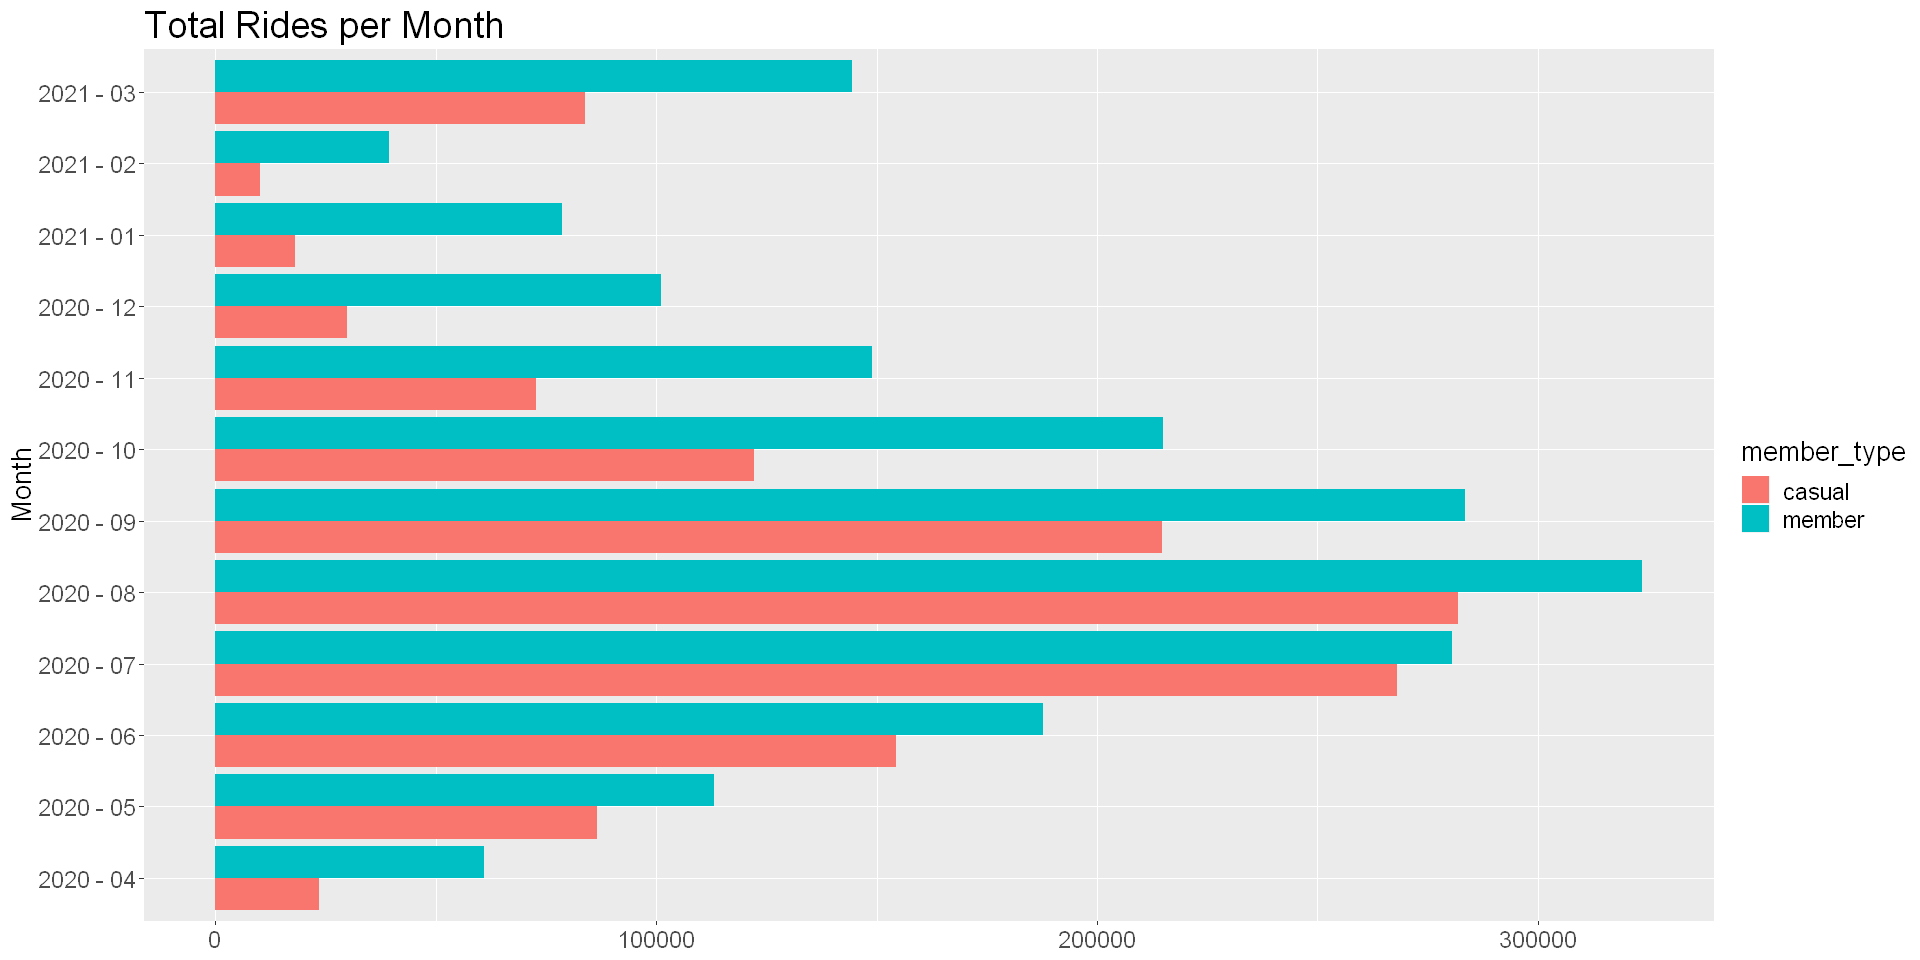

In [31]:
# plot monthly counts

fig(16, 8)

full_df_clean %>%
    ggplot(aes(year_month, fill = member_type)) +
    geom_bar(position = 'dodge') +
    labs(x = 'Month', title = 'Total Rides per Month') +
    coord_flip() + 
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.x = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

Some insights gathered from this chart:


* Aug-2020 had the most rides, approximately 18.1% of the total rides.
* Feb-2021 had the least rides, approximately 1.5% of the total rides.
* There were more rides by members for each month during the 12-months period.
* Jan-2021 had the largest relative difference between both groups, approximately 77%.
* Jul-2020 had the smallest relative difference between both groups, approximately 4.4%.

The distribution looks cyclical and seems to follow the seasonal weather. Let's compare it with climate data for Chicago. <br>
We will use data from [Climate of Chicago](https://en.wikipedia.org/wiki/Climate_of_Chicago).

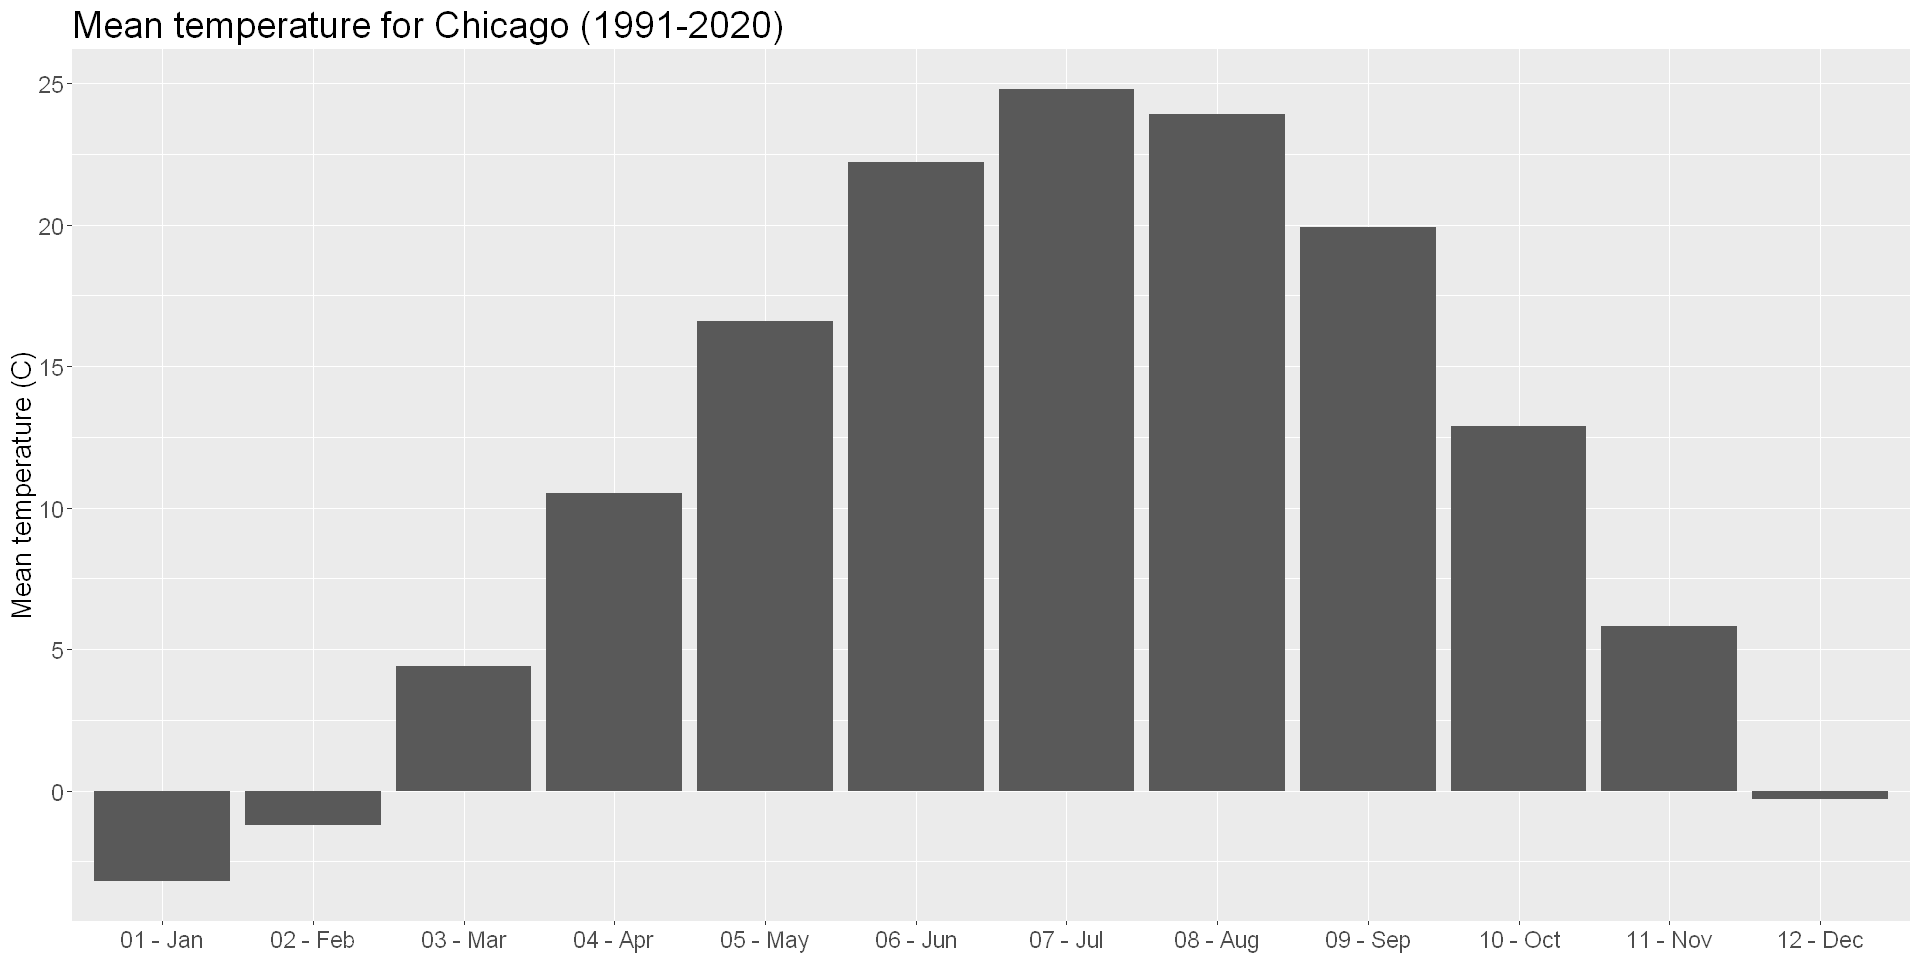

In [32]:
# store monthly mean temperature of Chicago (C)
chicago_mean_temp <- c(-3.2, -1.2, 4.4, 10.5, 16.6, 22.2, 24.8, 23.9, 19.9, 12.9, 5.8, -0.3)

# create a 'Month' list
month <- c('01 - Jan', '02 - Feb', 
           '03 - Mar', '04 - Apr', 
           '05 - May', '06 - Jun', 
           '07 - Jul', '08 - Aug', 
           '09 - Sep', '10 - Oct', 
           '11 - Nov', '12 - Dec')

# plot monthly mean temperature of Chicago
fig(16, 8)

data.frame(month, chicago_mean_temp) %>%
    ggplot(aes(x = month, y = chicago_mean_temp)) +
    labs(x = 'Month', y = 'Mean temperature (C)', title = 'Mean temperature for Chicago (1991-2020)') +
    geom_col() +
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.x = element_blank())

There appears to be a direct correlation between the temperature and the number of rides. This is possible as harsh winter conditions may be dangerous for cycling. Jun-2020 to Oct-2020 accounts for > 68% of the total rides. The temperatues during these months are more favourable for cycling.

In [33]:
# create days list for sorting purposes
days <- c('Monday', 
          'Tuesday', 
          'Wednesday', 
          'Thursday', 
          'Friday', 
          'Saturday', 
          'Sunday')

# sort column 'day_of_week' using the 'days' list
full_df_clean$day_of_week <- factor(full_df_clean$day_of_week, levels = days)

In [34]:
# total rides by day of week

rides_per_DoW <- total_rides(df = full_df_clean, var = day_of_week)
rides_per_DoW[order(rides_per_DoW$day_of_week),]

member_type,day_of_week,total_rides,perc_of_total
casual,Monday,144491,4.321305
member,Monday,257574,7.703288
casual,Tuesday,138738,4.149250
member,Tuesday,274525,8.210243
casual,Wednesday,151017,4.516479
member,Wednesday,294769,8.815682
casual,Thursday,158383,4.736774
member,Thursday,289445,8.656457
casual,Friday,198883,5.948011
member,Friday,294737,8.814725


In [35]:
# get % difference between casual riders vs members

rides_percent_diff_DoW <- rides_perc_diff(df = full_df_clean, var = day_of_week)
rides_percent_diff_DoW

day_of_week,total_rides,perc_of_total,member_riders_perc,casual_riders_perc,relative_diff_perc
Monday,402065,12.02459,64.06278,35.93722,43.903111
Tuesday,413263,12.35949,66.42864,33.57136,49.462526
Wednesday,445786,13.33216,66.12343,33.87657,48.767679
Thursday,447828,13.39323,64.63307,35.36693,45.280451
Friday,493620,14.76274,59.70929,40.29071,32.521875
Saturday,633244,18.93848,49.08503,50.91497,-3.728107
Sunday,507883,15.18930,50.26630,49.73370,1.059563


In [36]:
# calculate mean relative % difference for weekdays

weekday_rides <- rides_percent_diff_DoW %>%
    filter(day_of_week == 'Monday' |
           day_of_week == 'Tuesday' |
           day_of_week == 'Wednesday' |
           day_of_week == 'Thursday' |
           day_of_week == 'Friday')
           
           
mean(weekday_rides$relative_diff_perc)

[1] 43.98713

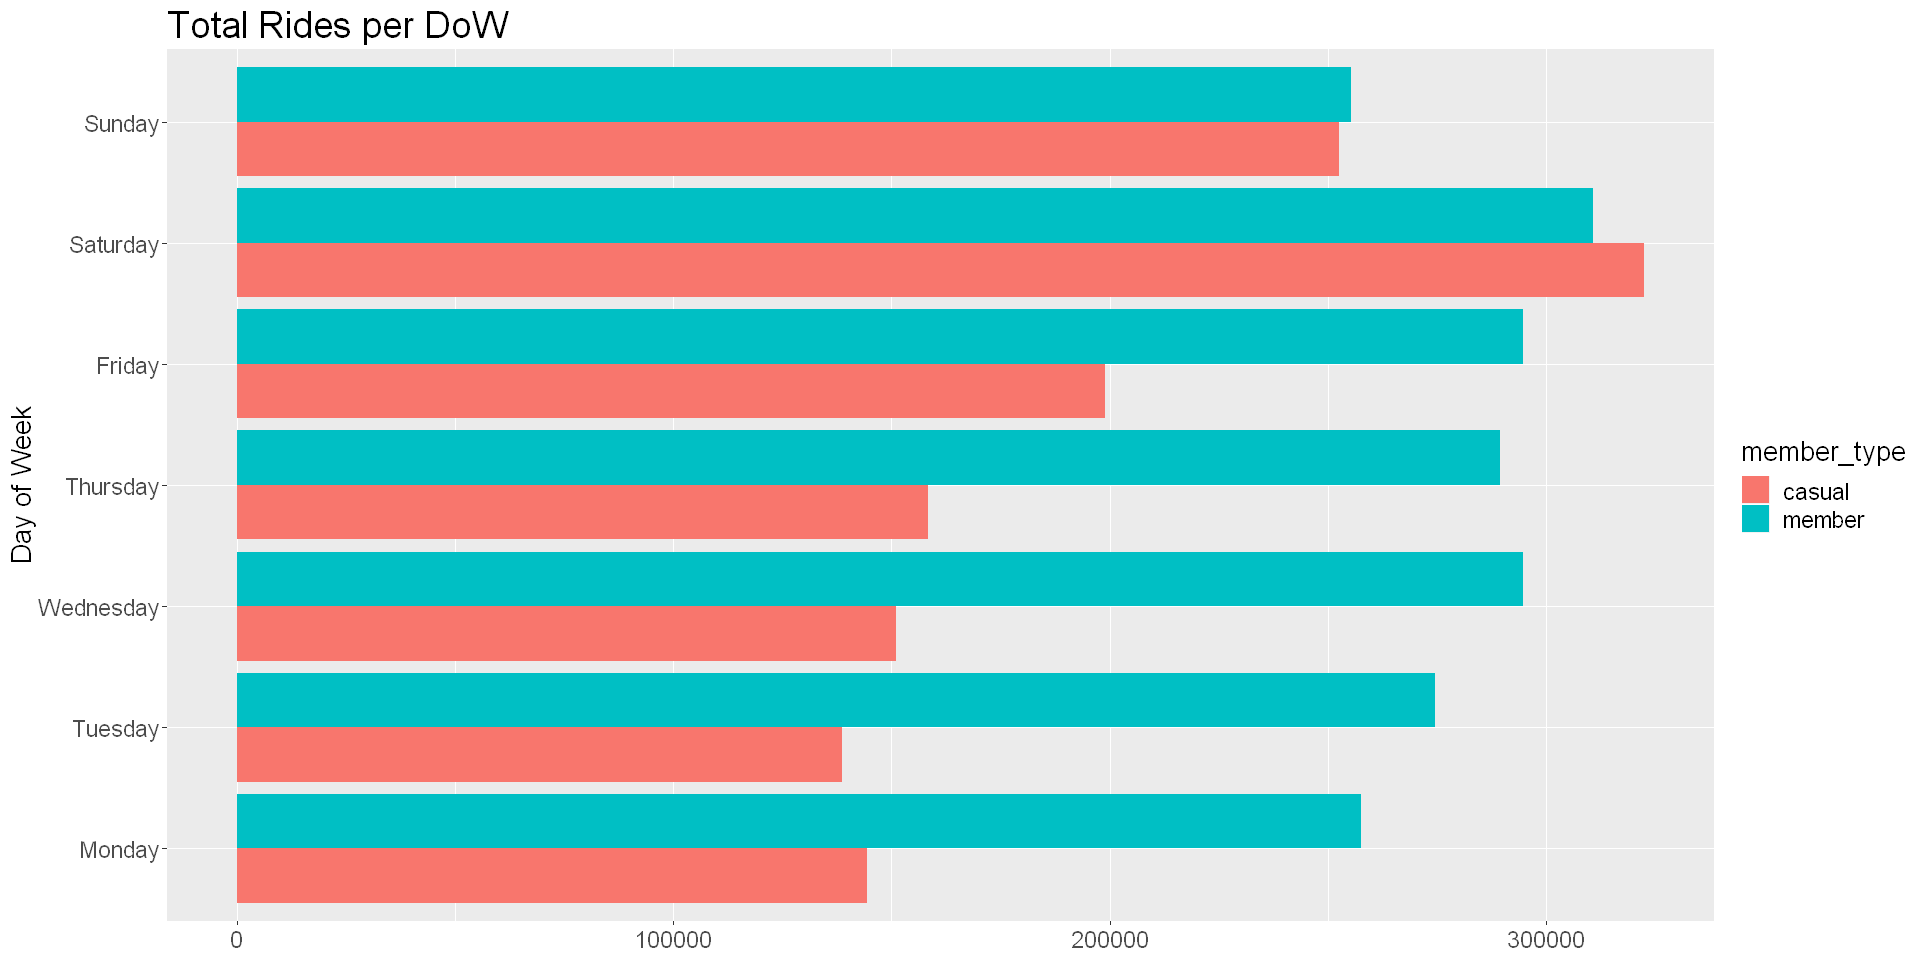

In [37]:
# plot daily counts

fig(16, 8)

full_df_clean %>%
    ggplot(aes(day_of_week, fill = member_type)) +
    geom_bar(position = 'dodge') +
    labs(x = 'Day of Week', title = 'Total Rides per DoW') +
    coord_flip() + 
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.x = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

Some insights gathered from this chart:


* Total rides during weekends is almost distributed equally among members and casual riders.
* The average relative difference between the 2 groups during weekdays is 43.99%.
* Except Saturday, there were more rides by members for each day of week during the 12-months period.
* It is likely that members are mainly using the bikes as their primary mode of transportation for work during office hours.
* Casual riders may be riding on adhoc basis or for leisure.

In [38]:
# total rides by hour of day

rides_per_HoD <- total_rides(df = full_df_clean, var = start_hour)
rides_per_HoD[order(rides_per_HoD$start_hour),]

member_type,start_hour,total_rides,perc_of_total
casual,00,21307,0.63723032
member,00,11221,0.33558743
casual,01,13261,0.39659789
member,01,6274,0.18763707
casual,02,7295,0.21817220
member,02,3353,0.10027846
casual,03,3854,0.11526192
member,03,2116,0.06328340
casual,04,3183,0.09519426
member,04,3355,0.10033828


In [39]:
# get % difference between casual riders vs members

rides_percent_diff_HoD <- rides_perc_diff(df = full_df_clean, var = start_hour)
rides_percent_diff_HoD

start_hour,total_rides,perc_of_total,member_riders_perc,casual_riders_perc,relative_diff_perc
00,32528,0.9728177,34.49643,65.50357,-89.885037
01,19535,0.5842350,32.11671,67.88329,-111.364361
02,10648,0.3184507,31.48948,68.51052,-117.566358
03,5970,0.1785453,35.44389,64.55611,-82.136106
04,6538,0.1955325,51.31539,48.68461,5.126677
05,21846,0.6533502,76.70054,23.29946,69.622822
06,67353,2.0143321,81.72316,18.27684,77.635667
07,114306,3.4185596,80.62306,19.37694,75.966015
08,130064,3.8898354,76.71377,23.28623,69.645309
09,123076,3.6808447,68.34964,31.65036,53.693445


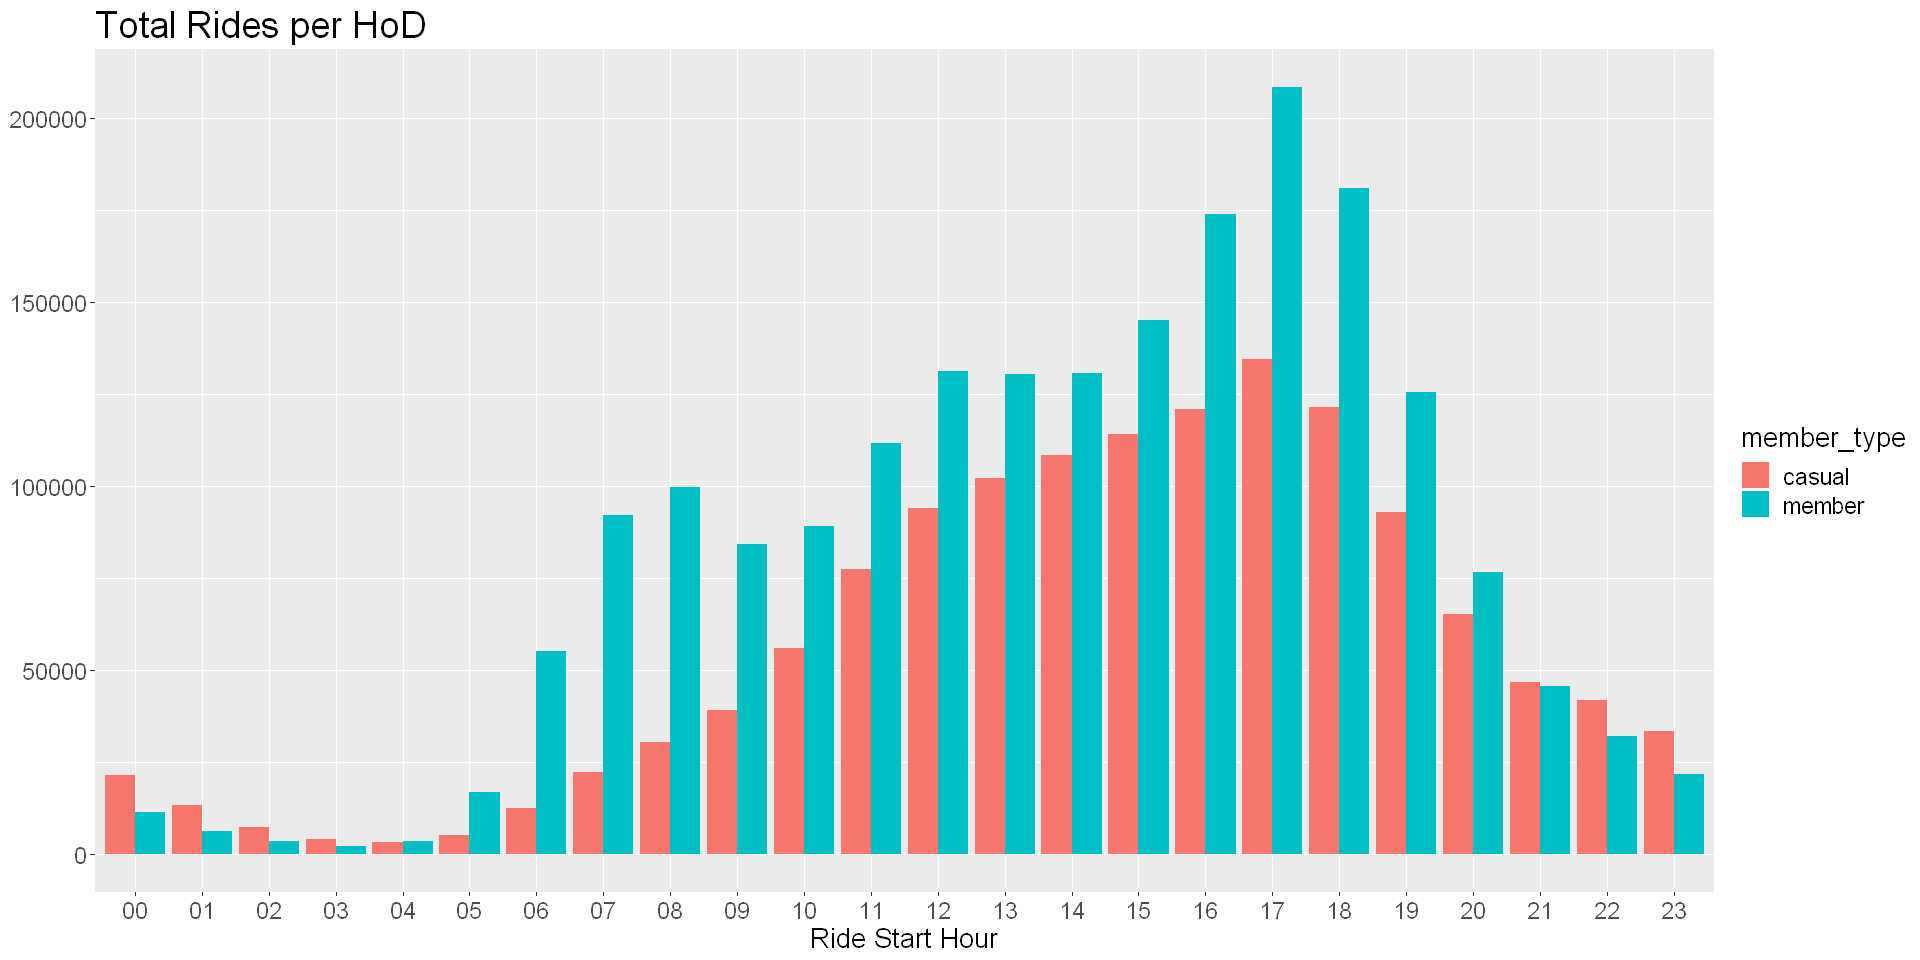

In [40]:
# plot hourly counts

fig(16, 8)

full_df_clean %>%
    ggplot(aes(start_hour, fill = member_type)) +
    geom_bar(position = 'dodge') +
    labs(x = 'Ride Start Hour', title = 'Total Rides per HoD') + 
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.y = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

Some insights gathered from this chart:


* There are more rides by casual riders for rides that started between 2100hrs to 0300hrs.
* The largest relative difference are for rides that started between 0500hrs and 0800hrs.
* This trend seems to support our earlier analysis that members are mainly using the bikes as their primary mode of transportation for work during office hours.

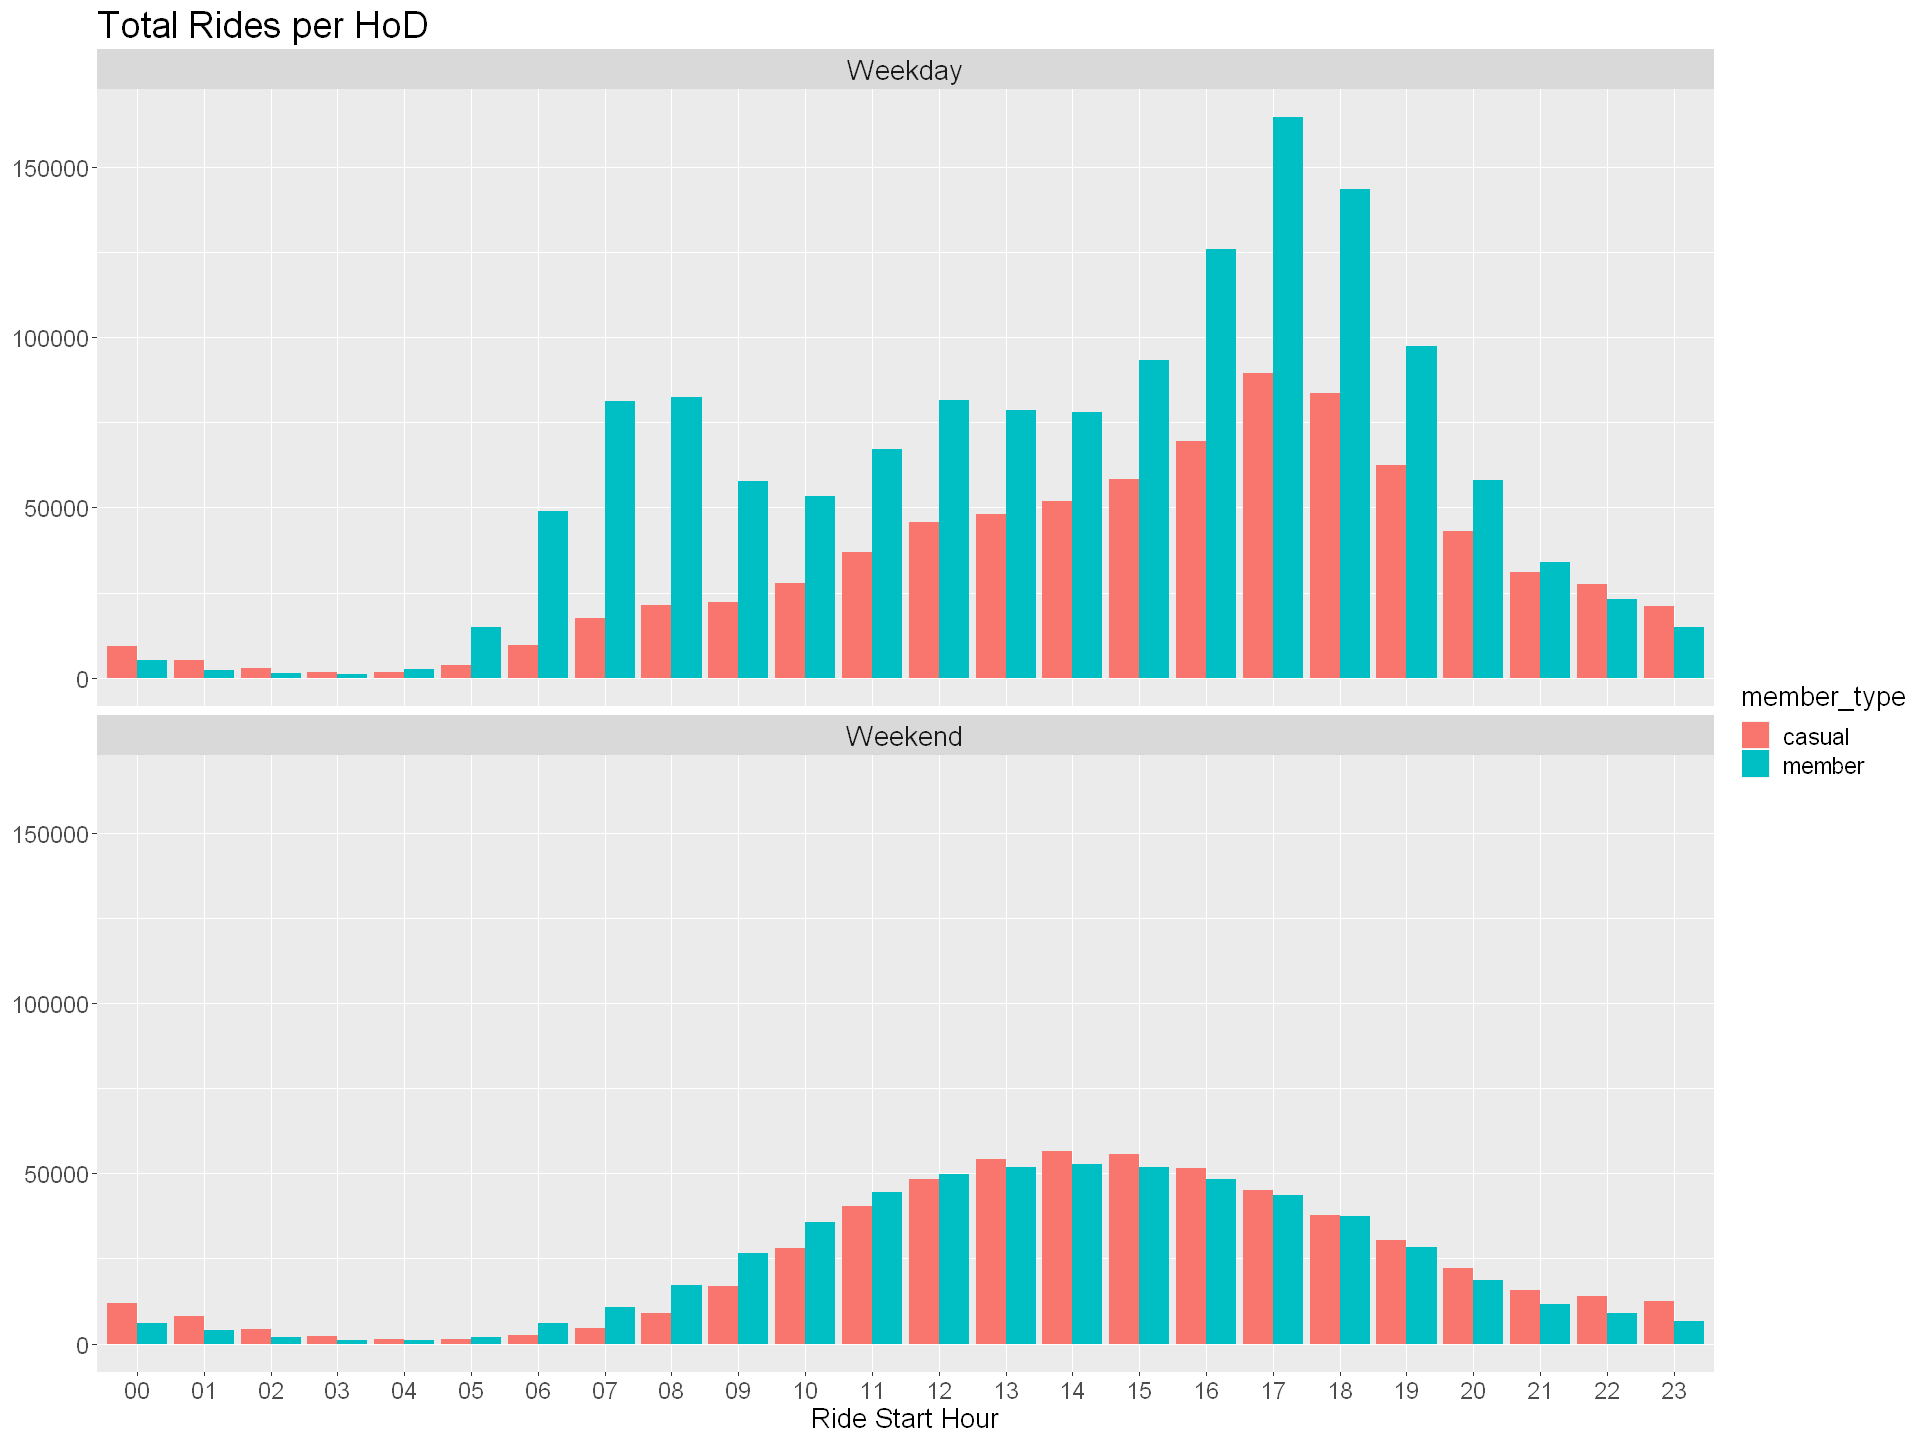

In [41]:
# plot weekday vs weekend comparison

fig(16, 12)
full_df_clean %>%
    mutate(part_of_week = ifelse(day_of_week == 'Saturday' | day_of_week == 'Sunday',
                                   'Weekend',
                                   'Weekday')) %>%
    ggplot(aes(start_hour, fill = member_type)) +
    labs(x = 'Ride Start Hour', title = 'Total Rides per HoD') +
    geom_bar(position = 'dodge') +
    facet_wrap(~ part_of_week, nrow = 2) +
    theme(plot.title = element_text(size = 22),
          strip.text = element_text(size = 16),
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.y = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

It is interesting to see that the number of rides between the 2 groups is almost equally distributed during weekends. While the trend for weekdays is close to that of the entire week.

In [42]:
# total rides by bike type

rides_per_bike <- total_rides(df = full_df_clean, var = rideable_type)
rides_per_bike[order(rides_per_bike$rideable_type),]

member_type,rideable_type,total_rides,perc_of_total
casual,docked_bike,1111358,33.237481
member,docked_bike,1432357,42.837626
casual,electric_bike,184581,5.520280
member,electric_bike,296096,8.855369
casual,classic_bike,70578,2.110782
member,classic_bike,248719,7.438461


In [43]:
# get % difference between casual riders vs members

rides_percent_diff_bike <- rides_perc_diff(df = full_df_clean, var = rideable_type)
rides_percent_diff_bike

rideable_type,total_rides,perc_of_total,member_riders_perc,casual_riders_perc,relative_diff_perc
docked_bike,2543715,76.075107,56.30965,43.69035,22.41054
electric_bike,480677,14.375649,61.59979,38.40021,37.66177
classic_bike,319297,9.549243,77.89581,22.10419,71.62340


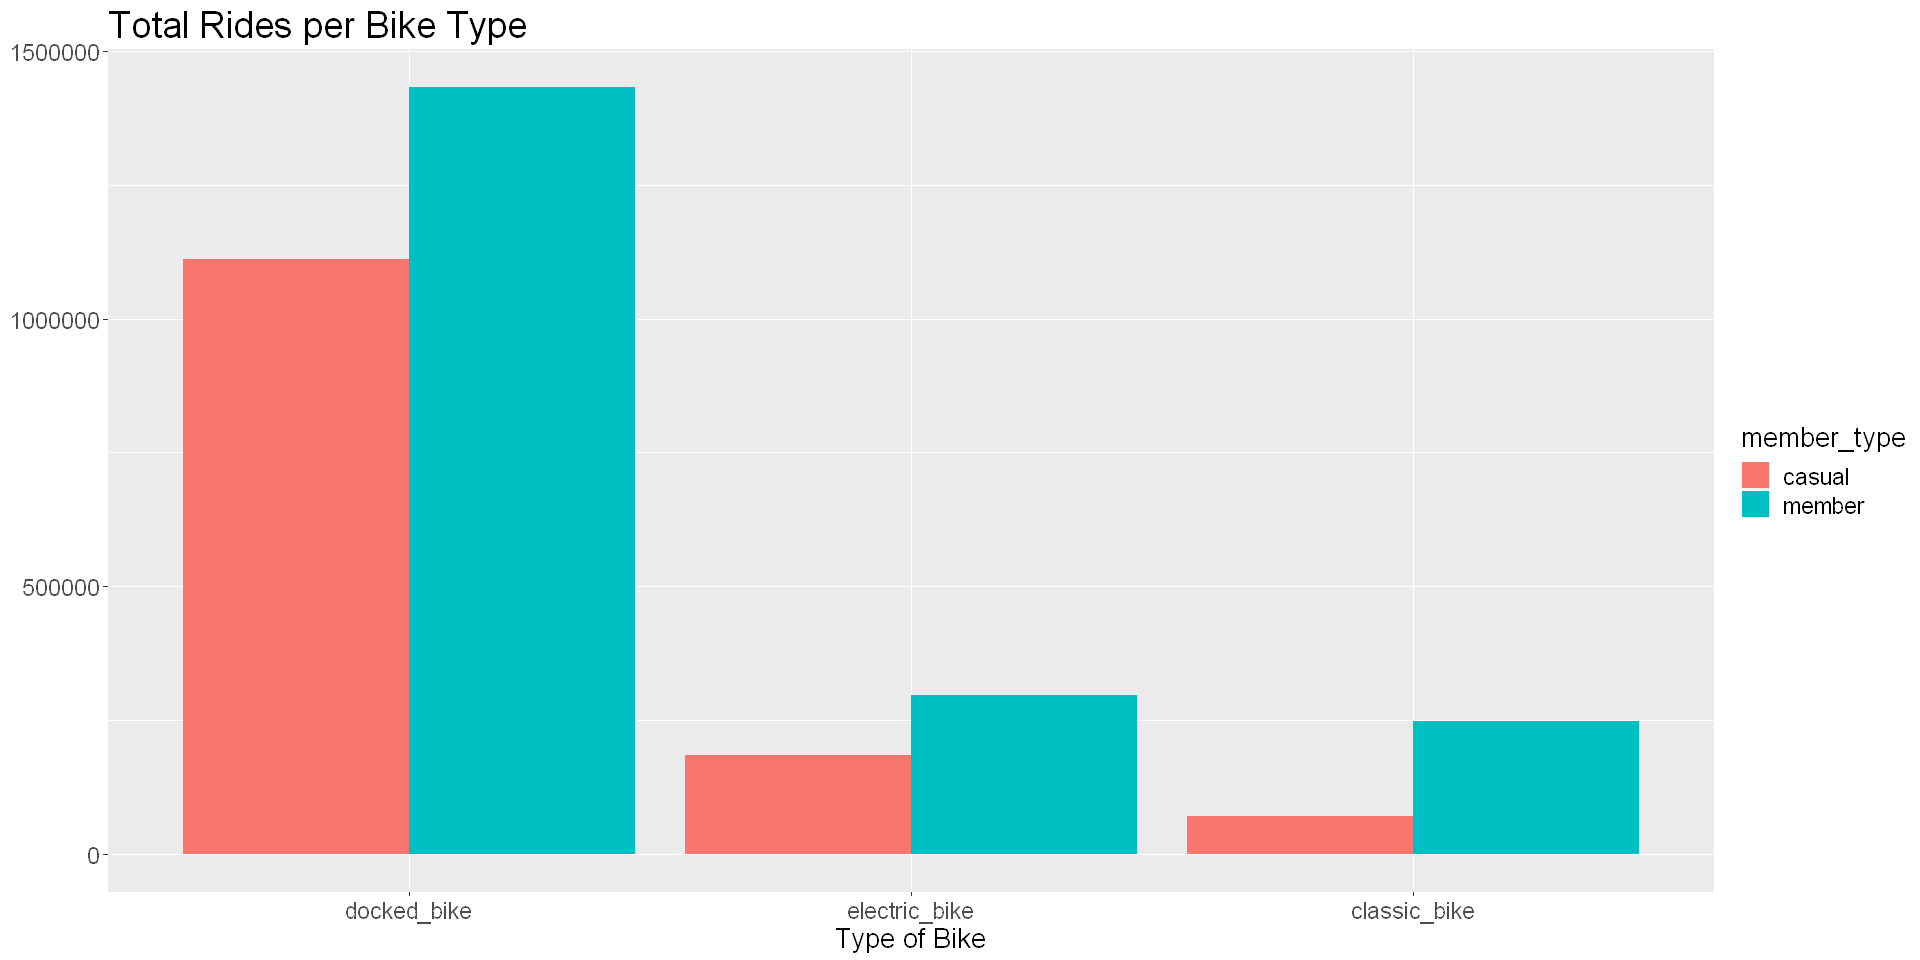

In [44]:
# plot total rides by bike type

fig(16, 8)

full_df_clean %>%
    ggplot(aes(rideable_type, fill = member_type)) +
    geom_bar(position = 'dodge') +
    labs(x = 'Type of Bike', title = 'Total Rides per Bike Type') + 
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.y = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

In [53]:
# split casual and member rides

casual <- full_df_clean %>%
    filter(member_type == 'casual')

member <- full_df_clean %>%
    filter(member_type == 'member')

In [54]:
# calculate individual percentage share

casual %>%
    group_by(rideable_type) %>%
    summarise(total_rides = length(ride_id),
             'perc_of_total' = (length(ride_id) / nrow(casual)) * 100)

rideable_type,total_rides,perc_of_total
docked_bike,1111358,81.32778
electric_bike,184581,13.50741
classic_bike,70578,5.16481


In [55]:
# calculate individual percentage share

member %>%
    group_by(rideable_type) %>%
    summarise(total_rides = length(ride_id),
             'perc_of_total' = (length(ride_id) / nrow(member)) * 100)

rideable_type,total_rides,perc_of_total
docked_bike,1432357,72.44473
electric_bike,296096,14.97573
classic_bike,248719,12.57953


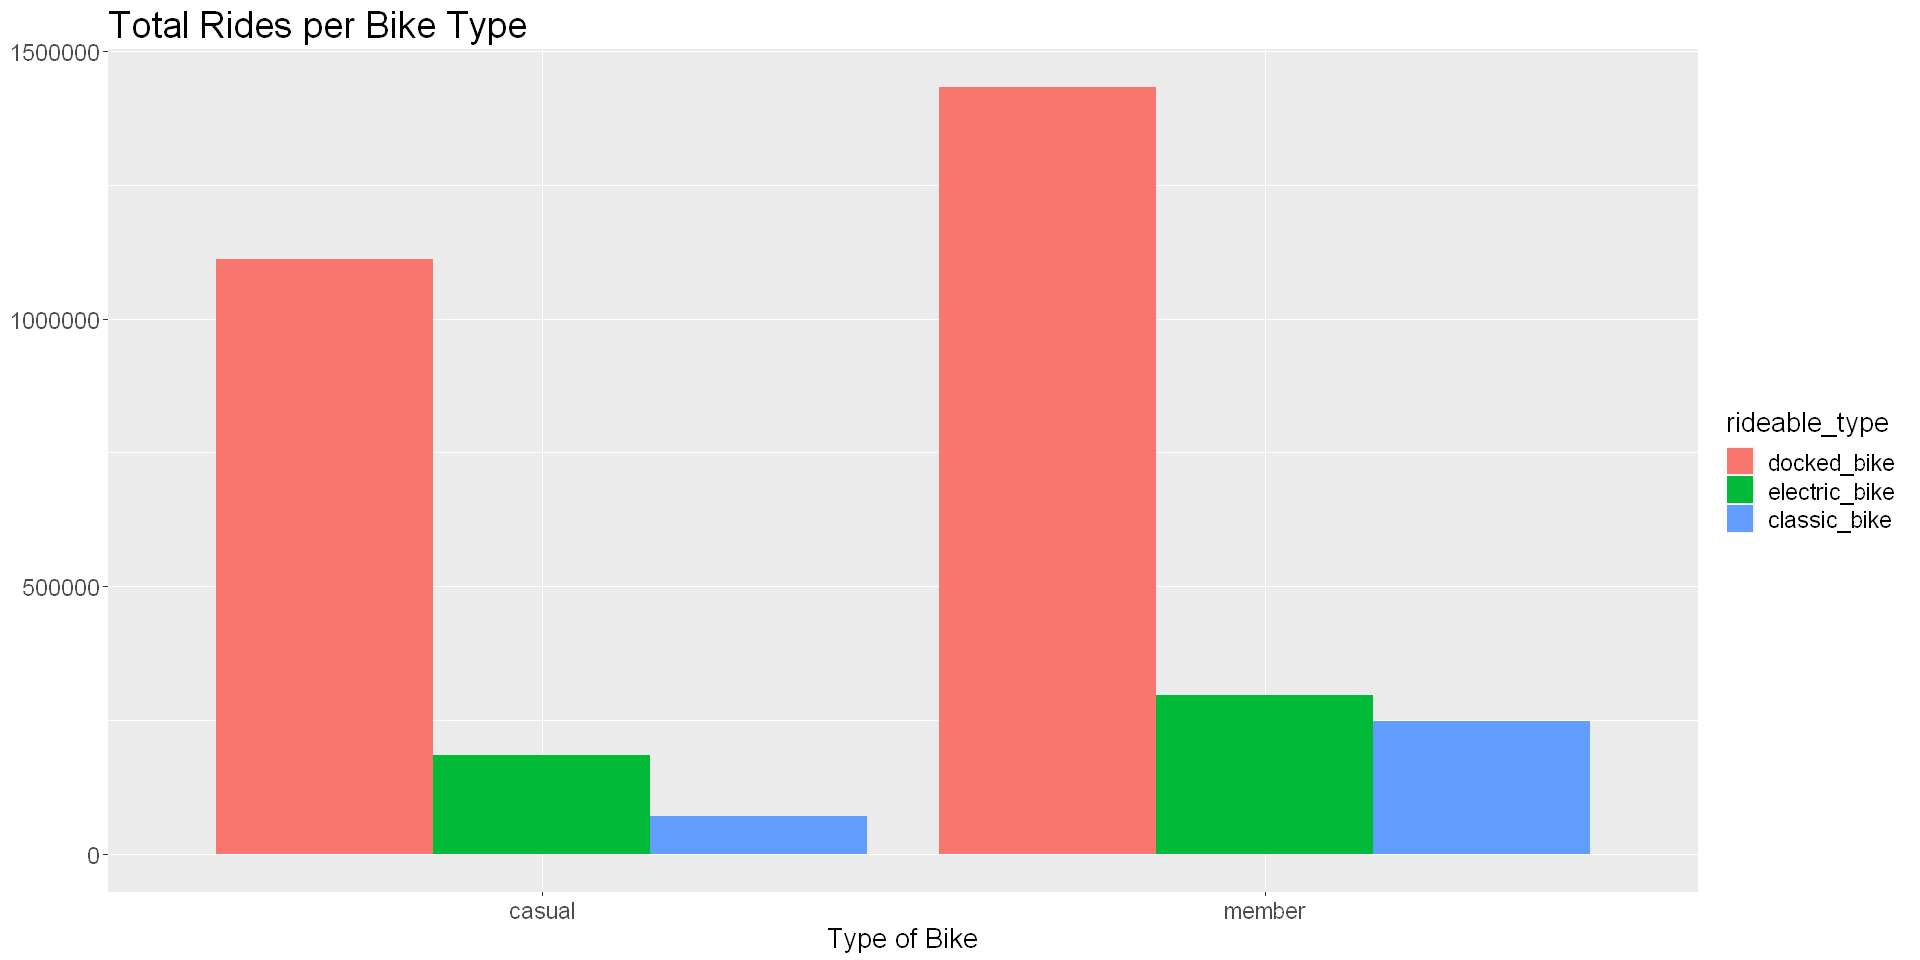

In [50]:
# plot total rides by bike type for each group

fig(16, 8)

full_df_clean %>%
    ggplot(aes(member_type, fill = rideable_type)) +
    geom_bar(position = 'dodge') +
    labs(x = 'Type of Bike', title = 'Total Rides per Bike Type') + 
    theme(plot.title = element_text(size = 22), 
          axis.text = element_text(size = 14),
          axis.title = element_text(size = 16),
          axis.title.y = element_blank(),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14))

Some insights gathered from this chart:

* There are more rides by members across all three bike types.
* Casual riders prefer docked and electric bikes as compared to classic bikes.
* 81% of rides by casual riders are with a docked bike, as compared to 72% of rides by members.

In [45]:
# calculate mean and median ride duration and distance covered for both groups

agg_duration_distance <- full_df_clean %>% 
    group_by(member_type) %>% 
    summarise(mean_duration_mins = mean(ride_duration_mins),
              median_duration_mins = median(ride_duration_mins),
              mean_distance_km = mean(distance_km),
              median_distance_km = median(distance_km))

agg_duration_distance

member_type,mean_duration_mins,median_duration_mins,mean_distance_km,median_distance_km
casual,45.11388,21.48333,2.164240,1.654501
member,15.92328,11.53333,2.260434,1.713488


There is a distinct difference in the ride duration between casual and member riders. This tells us that member riders are more likely to have a destination in mind but casual riders are more likely using the bike to explore places.

As for the distance covered, there is not much difference between the 2 groups.

In [49]:
# calculate mean and median ride duration and distance covered for both groups
# for each day of week

agg_duration_distance_DoW <- full_df_clean %>% 
    group_by(member_type, day_of_week) %>% 
    summarise(mean_duration_mins = mean(ride_duration_mins),
              median_duration_mins = median(ride_duration_mins),
              mean_distance_km = mean(distance_km),
              median_distance_km = median(distance_km))

agg_duration_distance_DoW[order(agg_duration_distance_DoW$day_of_week),]

member_type,day_of_week,mean_duration_mins,median_duration_mins,mean_distance_km,median_distance_km
casual,Monday,45.07045,21.08333,2.036103,1.538916
member,Monday,15.12339,10.88333,2.205428,1.643737
casual,Tuesday,40.52171,19.36667,2.088147,1.612817
member,Tuesday,14.96723,10.91667,2.210805,1.662827
casual,Wednesday,40.48280,18.76667,2.126467,1.654287
member,Wednesday,15.05202,10.96667,2.226518,1.674629
casual,Thursday,43.23258,18.93333,2.128558,1.657903
member,Thursday,15.02532,11.00000,2.222677,1.685707
casual,Friday,42.94270,20.06667,2.175829,1.690727
member,Friday,15.55998,11.33333,2.236755,1.696243


* Casual riders tend to have longer rides for all days.
* It is interesting to see that members mean ride duration is consistent during weekdays, which further supports our earlier observation.

### Findings

To sum up, the aim of this analysis is to determine how casual and member riders differ in their usage of the shared bicycles and how the marketing team can use the insights gathered to develop a targeted marketing approach to get casual riders to purchase an annual membership.


The main difference between casual and member riders are:

* Members tend to use the bikes as their primary mode of transportaion for work, as there were significantly higher percentage of rides by members between 0600hrs to 0800hrs and 1700hrs to 1900hrs on weekdays.
* Casual riders prefer docked bke over the other 2 options. This is likely because they do not have an end destination and wouldn't mind having to return the bike to the original pickup point.
* Casual riders tend to avoid cycling during winter.

![image info](./images/membership.jfif)

### Recommendations

Based on the above findings, here are my top three receommendations:

* Provide discounted rides for new members during weekdays morning and evening rush hour (for a certain period like the first month), to push towards making the bicycles as their primary mode of transportation.
* Form a partnership with a sportswear brand (Decathlon) and provide discounts on cycling gears for members, with special emphasis on winter cycling gears.
* Have a campaign where members can collect points once they cycled a particular route for a certain number of times (e.g. home -> office or office -> home). These points can then be used to redeem rides.